In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
nums = pd.read_csv('macro_joined_daily.csv', parse_dates=['date'])
googl_stock = pd.read_csv('googl_stock_prices.csv', parse_dates=['date'])
meta_stock = pd.read_csv('meta_stock_prices.csv', parse_dates=['date'])
msft_stock = pd.read_csv('msft_stock_prices.csv', parse_dates=['date'])
orcl_stock = pd.read_csv('orcl_stock_prices.csv', parse_dates=['date'])
pltr_stock = pd.read_csv('pltr_stock_prices.csv', parse_dates=['date'])

создадим датасеты под (виды новостей и компании)

Добавим столбцы с названием компании и типом новости

Теперь то же самое по другим компаниям

# ГУГЛ

In [ ]:
google_controversies = pd.read_csv('google_controversies_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
google_deals = pd.read_csv('google_deals_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
google_financial = pd.read_csv('google_financial_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
google_products = pd.read_csv('google_products_2023jan_2025oct_drop_duplicates.csv', parse_dates=['date'])
google_regulatory = pd.read_csv('google_regulatory_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
google_competitors = pd.read_csv('google_competitor_success_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])

name = 'Google'

google_controversies[['company', 'type']] = [name, 'controversies']
google_deals[['company', 'type']] = [name, 'deals']
google_financial[['company', 'type']] = [name, 'financial']
google_products[['company', 'type']] = [name, 'products']
google_regulatory[['company', 'type']] = [name, 'regulatory']
google_competitors[['company', 'type']] = [name, 'competitors']

In [ ]:
google_data = pd.concat([google_controversies, google_deals, google_financial, google_products, google_regulatory, google_competitors])
google_data = google_data.drop(columns='Unnamed: 0')
google_data = google_data.sort_values('date')
google_data

,date,title,url,company,type
0,2023-01-02 08:00:00,Google Cancels $600M Minnesota Data Center But...,https://news.google.com/rss/articles/CBMiiwFBV...,Google,regulatory
0,2023-01-02 08:00:00,Google Pixel 7 Pro Two Months Later - Forbes,https://news.google.com/rss/articles/CBMiiwFBV...,Google,products
0,2023-01-03 08:00:00,Google alleges India antitrust body copied par...,https://news.google.com/rss/articles/CBMitAFBV...,Google,controversies
1,2023-01-03 08:00:00,Best Google Pixel 6 Deals - Forbes,https://news.google.com/rss/articles/CBMif0FVX...,Google,products
2,2023-01-03 08:00:00,Google Pixel 7 and 7 Pro defect causing broken...,https://news.google.com/rss/articles/CBMitAFBV...,Google,products
...,...,...,...,...,...
870,2025-10-25 07:00:00,Oppo partners with Google to introduce next-ge...,https://news.google.com/rss/articles/CBMi-gFBV...,Google,deals
999,2025-10-25 07:00:00,"OnlyFans Beats Apple, Google, And Nvidia With ...",https://news.google.com/rss/articles/CBMizwFBV...,Google,financial
440,2025-10-27 07:00:00,Anthropic expands Google Cloud partnership and...,https://news.google.com/rss/articles/CBMiwwFBV...,Google,competitors
439,2025-10-27 07:00:00,Microsoft Copilot Fall Update Introduces New F...,https://news.google.com/rss/articles/CBMiowFBV...,Google,competitors


In [ ]:
googl_news_stocks = pd.merge_asof(left=google_data, right= googl_stock, on='date', direction='forward')
googl_news_stocks

,date,title,url,company,type,open,close,volume,change_pct
0,2023-01-02 08:00:00,Google Cancels $600M Minnesota Data Center But...,https://news.google.com/rss/articles/CBMiiwFBV...,Google,regulatory,89.2614,88.7980,28233202,-0.519149
1,2023-01-02 08:00:00,Google Pixel 7 Pro Two Months Later - Forbes,https://news.google.com/rss/articles/CBMiiwFBV...,Google,products,89.2614,88.7980,28233202,-0.519149
2,2023-01-03 08:00:00,Google alleges India antitrust body copied par...,https://news.google.com/rss/articles/CBMitAFBV...,Google,controversies,90.0236,87.7618,34981128,-2.512452
3,2023-01-03 08:00:00,Best Google Pixel 6 Deals - Forbes,https://news.google.com/rss/articles/CBMif0FVX...,Google,products,90.0236,87.7618,34981128,-2.512452
4,2023-01-03 08:00:00,Google Pixel 7 and 7 Pro defect causing broken...,https://news.google.com/rss/articles/CBMitAFBV...,Google,products,90.0236,87.7618,34981128,-2.512452
...,...,...,...,...,...,...,...,...,...
7351,2025-10-25 07:00:00,Oppo partners with Google to introduce next-ge...,https://news.google.com/rss/articles/CBMi-gFBV...,Google,deals,264.8150,269.2700,35235231,1.682307
7352,2025-10-25 07:00:00,"OnlyFans Beats Apple, Google, And Nvidia With ...",https://news.google.com/rss/articles/CBMizwFBV...,Google,financial,264.8150,269.2700,35235231,1.682307
7353,2025-10-27 07:00:00,Anthropic expands Google Cloud partnership and...,https://news.google.com/rss/articles/CBMiwwFBV...,Google,competitors,269.6900,267.4700,29738564,-0.823167
7354,2025-10-27 07:00:00,Microsoft Copilot Fall Update Introduces New F...,https://news.google.com/rss/articles/CBMiowFBV...,Google,competitors,269.6900,267.4700,29738564,-0.823167


# МЕТА

In [ ]:
meta_controversies = pd.read_csv('meta_controversies_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
meta_deals = pd.read_csv('meta_deals_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
meta_financial = pd.read_csv('meta_financial_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
meta_products = pd.read_csv('meta_products_2023jan_2025oct_drop_duplicates.csv', parse_dates=['date'])
meta_regulatory = pd.read_csv('meta_regulatory_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
meta_competitors = pd.read_csv('meta_competitor_success_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])

name = 'Meta'


meta_controversies[['company', 'type']] = [name, 'controversies']
meta_deals[['company', 'type']] = [name, 'deals']
meta_financial[['company', 'type']] = [name, 'financial']
meta_products[['company', 'type']] = [name, 'products']
meta_regulatory[['company', 'type']] = [name, 'regulatory']
meta_competitors[['company', 'type']] = [name, 'competitors']

In [ ]:
meta_data = pd.concat([meta_controversies, meta_deals, meta_financial, meta_products, meta_regulatory, meta_competitors])
meta_data = meta_data.drop(columns='Unnamed: 0')
meta_data = meta_data.sort_values('date')
meta_data

,date,title,url,company,type
0,2023-01-01 08:00:00,Sulfite activation for ciprofloxacin rapid deg...,https://news.google.com/rss/articles/CBMie0FVX...,Meta,controversies
1,2023-01-01 08:00:00,Facebook Whistleblower: social media 'asleep a...,https://news.google.com/rss/articles/CBMitAFBV...,Meta,controversies
0,2023-01-01 08:00:00,Meta is preparing to announce whether Trump wi...,https://news.google.com/rss/articles/CBMirwFBV...,Meta,financial
0,2023-01-01 08:00:00,Records: Whitmer amped up Facebook and YouTube...,https://news.google.com/rss/articles/CBMiugFBV...,Meta,products
1,2023-01-02 08:00:00,Meta to announce decision on Trump’s return to...,https://news.google.com/rss/articles/CBMimAFBV...,Meta,financial
...,...,...,...,...,...
1215,2025-10-25 07:00:00,Reliance-Meta AI deal formalised - financialex...,https://news.google.com/rss/articles/CBMilwFBV...,Meta,financial
908,2025-10-25 07:00:00,"RIL, Meta To Jointly Invest INR 855 Cr In AI J...",https://news.google.com/rss/articles/CBMiiAFBV...,Meta,deals
905,2025-10-25 07:00:00,Reliance and Meta Form Joint Venture to Develo...,https://news.google.com/rss/articles/CBMivgFBV...,Meta,deals
906,2025-10-25 07:00:00,Reliance partners with Meta’s Facebook unit to...,https://news.google.com/rss/articles/CBMi1AFBV...,Meta,deals


In [ ]:
meta_news_stocks = pd.merge_asof(left=meta_data, right= meta_stock, on='date', direction='forward')
meta_news_stocks

,date,title,url,company,type,open,close,volume,change_pct
0,2023-01-01 08:00:00,Sulfite activation for ciprofloxacin rapid deg...,https://news.google.com/rss/articles/CBMie0FVX...,Meta,controversies,122.82,124.74,35528531,1.563263
1,2023-01-01 08:00:00,Facebook Whistleblower: social media 'asleep a...,https://news.google.com/rss/articles/CBMitAFBV...,Meta,controversies,122.82,124.74,35528531,1.563263
2,2023-01-01 08:00:00,Meta is preparing to announce whether Trump wi...,https://news.google.com/rss/articles/CBMirwFBV...,Meta,financial,122.82,124.74,35528531,1.563263
3,2023-01-01 08:00:00,Records: Whitmer amped up Facebook and YouTube...,https://news.google.com/rss/articles/CBMiugFBV...,Meta,products,122.82,124.74,35528531,1.563263
4,2023-01-02 08:00:00,Meta to announce decision on Trump’s return to...,https://news.google.com/rss/articles/CBMimAFBV...,Meta,financial,122.82,124.74,35528531,1.563263
...,...,...,...,...,...,...,...,...,...
6114,2025-10-25 07:00:00,Reliance-Meta AI deal formalised - financialex...,https://news.google.com/rss/articles/CBMilwFBV...,Meta,financial,749.73,750.82,11321080,0.145386
6115,2025-10-25 07:00:00,"RIL, Meta To Jointly Invest INR 855 Cr In AI J...",https://news.google.com/rss/articles/CBMiiAFBV...,Meta,deals,749.73,750.82,11321080,0.145386
6116,2025-10-25 07:00:00,Reliance and Meta Form Joint Venture to Develo...,https://news.google.com/rss/articles/CBMivgFBV...,Meta,deals,749.73,750.82,11321080,0.145386
6117,2025-10-25 07:00:00,Reliance partners with Meta’s Facebook unit to...,https://news.google.com/rss/articles/CBMi1AFBV...,Meta,deals,749.73,750.82,11321080,0.145386


# МАЙКРОСОФТ

In [ ]:
microsoft_controversies = pd.read_csv('microsoft_controversies_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
microsoft_deals = pd.read_csv('microsoft_deals_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
microsoft_financial = pd.read_csv('microsoft_financial_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
microsoft_products = pd.read_csv('microsoft_products_2023jan_2025oct_drop_duplicates.csv', parse_dates=['date'])
microsoft_regulatory = pd.read_csv('microsoft_regulatory_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
microsoft_competitors = pd.read_csv('microsoft_competitors_success_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])

name = 'Microsoft'

microsoft_controversies[['company', 'type']] = [name, 'controversies']
microsoft_deals[['company', 'type']] = [name, 'deals']
microsoft_financial[['company', 'type']] = [name, 'financial']
microsoft_products[['company', 'type']] = [name, 'products']
microsoft_regulatory[['company', 'type']] = [name, 'regulatory']
microsoft_competitors[['company', 'type']] = [name, 'competitors']


In [ ]:
microsoft_data = pd.concat([microsoft_controversies, microsoft_deals, microsoft_financial, microsoft_products, microsoft_regulatory, microsoft_competitors])
microsoft_data = microsoft_data.drop(columns='snippet')
microsoft_data = microsoft_data.sort_values('date')
microsoft_data

,date,title,url,company,type
0,2023-01-02 08:00:00,"TCS, Wipro, IndusNet teams win Microsoft India...",https://news.google.com/rss/articles/CBMi2AFBV...,Microsoft,controversies
0,2023-01-02 08:00:00,Top Chief Technology Officers to Watch in 2023...,https://news.google.com/rss/articles/CBMiuAFBV...,Microsoft,regulatory
1,2023-01-03 08:00:00,Hyundai Motor Group’s Supernal collaborates wi...,https://news.google.com/rss/articles/CBMi6gFBV...,Microsoft,controversies
0,2023-01-03 08:00:00,What’s New in Python in Visual Studio Code’s D...,https://news.google.com/rss/articles/CBMilgFBV...,Microsoft,products
1,2023-01-03 08:00:00,How CyberShikshaa is ushering in gender divers...,https://news.google.com/rss/articles/CBMiyAFBV...,Microsoft,regulatory
...,...,...,...,...,...
711,2025-10-25 07:00:00,"OnlyFans beat Apple, Nvidia, Google, Meta and ...",https://news.google.com/rss/articles/CBMimAJBV...,Microsoft,financial
712,2025-10-25 07:00:00,Key facts: Microsoft to report Q3 earnings; op...,https://news.google.com/rss/articles/CBMizgFBV...,Microsoft,financial
4,2025-10-26 07:00:00,Is Amazon AWS in Trouble After Anthropic Partn...,https://news.google.com/rss/articles/CBMikgFBV...,Microsoft,competitors
5,2025-10-27 07:00:00,Anthropic expands Google Cloud partnership and...,https://news.google.com/rss/articles/CBMiwwFBV...,Microsoft,competitors


In [ ]:
msft_news_stocks = pd.merge_asof(left=microsoft_data, right= msft_stock, on='date', direction='forward')
msft_news_stocks

,date,title,url,company,type,open,close,volume,change_pct
0,2023-01-02 08:00:00,"TCS, Wipro, IndusNet teams win Microsoft India...",https://news.google.com/rss/articles/CBMi2AFBV...,Microsoft,controversies,239.155,235.711,2.616246e+07,-1.440070
1,2023-01-02 08:00:00,Top Chief Technology Officers to Watch in 2023...,https://news.google.com/rss/articles/CBMiuAFBV...,Microsoft,regulatory,239.155,235.711,2.616246e+07,-1.440070
2,2023-01-03 08:00:00,Hyundai Motor Group’s Supernal collaborates wi...,https://news.google.com/rss/articles/CBMi6gFBV...,Microsoft,controversies,228.526,225.402,5.145418e+07,-1.367022
3,2023-01-03 08:00:00,What’s New in Python in Visual Studio Code’s D...,https://news.google.com/rss/articles/CBMilgFBV...,Microsoft,products,228.526,225.402,5.145418e+07,-1.367022
4,2023-01-03 08:00:00,How CyberShikshaa is ushering in gender divers...,https://news.google.com/rss/articles/CBMiyAFBV...,Microsoft,regulatory,228.526,225.402,5.145418e+07,-1.367022
...,...,...,...,...,...,...,...,...,...
4578,2025-10-25 07:00:00,"OnlyFans beat Apple, Nvidia, Google, Meta and ...",https://news.google.com/rss/articles/CBMimAJBV...,Microsoft,financial,531.780,531.520,1.873472e+07,-0.048892
4579,2025-10-25 07:00:00,Key facts: Microsoft to report Q3 earnings; op...,https://news.google.com/rss/articles/CBMizgFBV...,Microsoft,financial,531.780,531.520,1.873472e+07,-0.048892
4580,2025-10-26 07:00:00,Is Amazon AWS in Trouble After Anthropic Partn...,https://news.google.com/rss/articles/CBMikgFBV...,Microsoft,competitors,531.780,531.520,1.873472e+07,-0.048892
4581,2025-10-27 07:00:00,Anthropic expands Google Cloud partnership and...,https://news.google.com/rss/articles/CBMiwwFBV...,Microsoft,competitors,550.000,542.070,2.998668e+07,-1.441818


# ОРАКЛ

In [ ]:
oracle_controversies = pd.read_csv('oracle_controversies_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
oracle_deals = pd.read_csv('oracle_deals_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
oracle_financial = pd.read_csv('oracle_financial_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
oracle_products = pd.read_csv('oracle_products_2023jan_2025oct_drop_duplicates.csv', parse_dates=['date'])
oracle_regulatory = pd.read_csv('oracle_regulatory_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
oracle_competitors = pd.read_csv('oracle_competitor_success_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])

name = 'Oracle'

oracle_controversies[['company', 'type']] = [name, 'controversies']
oracle_deals[['company', 'type']] = [name, 'deals']
oracle_financial[['company', 'type']] = [name, 'financial']
oracle_products[['company', 'type']] = [name, 'products']
oracle_regulatory[['company', 'type']] = [name, 'regulatory']
oracle_competitors[['company', 'type']] = [name, 'competitors']

In [ ]:
oracle_data = pd.concat([oracle_controversies, oracle_deals, oracle_financial, oracle_products, oracle_regulatory, oracle_competitors])
oracle_data = oracle_data.drop(columns=['Unnamed: 0', 'snippet'])
oracle_data = oracle_data.sort_values('date')
oracle_data

,date,title,url,company,type
0,2023-01-01 08:00:00,Upgrade your EBS Database to 19c on Exadata Cl...,https://news.google.com/rss/articles/CBMiogFBV...,Oracle,products
0,2023-01-01 08:00:00,Upgrade your EBS Database to 19c on Exadata Cl...,https://news.google.com/rss/articles/CBMiogFBV...,Oracle,financial
0,2023-01-03 08:00:00,Reading restaurant in Oracle Shopping Centre a...,https://news.google.com/rss/articles/CBMiqwFBV...,Oracle,controversies
0,2023-01-05 08:00:00,General Atomics Awarded Contract from Advanced...,https://news.google.com/rss/articles/CBMiqgFBV...,Oracle,regulatory
1,2023-01-09 08:00:00,Responsible AI for healthcare and financial se...,https://news.google.com/rss/articles/CBMifkFVX...,Oracle,financial
...,...,...,...,...,...
951,2025-10-25 07:00:00,Oracle Enhances Cloud Database with New AI Fea...,https://news.google.com/rss/articles/CBMipgFBV...,Oracle,products
1034,2025-10-25 07:00:00,"7,840 Shares in Oracle Corporation $ORCL Acqui...",https://news.google.com/rss/articles/CBMi2AFBV...,Oracle,financial
1035,2025-10-25 07:00:00,Oracle Financial Services Grants Stock Options...,https://news.google.com/rss/articles/CBMisAFBV...,Oracle,financial
312,2025-10-28 07:00:00,Oracle-Google Cloud AI Integration Powers Ente...,https://news.google.com/rss/articles/CBMilgFBV...,Oracle,competitors


In [ ]:
orcl_news_stocks = pd.merge_asof(left=oracle_data, right= orcl_stock, on='date', direction='forward')
orcl_news_stocks

,date,title,url,company,type,open,close,volume,change_pct
0,2023-01-01 08:00:00,Upgrade your EBS Database to 19c on Exadata Cl...,https://news.google.com/rss/articles/CBMiogFBV...,Oracle,products,82.47,83.72,8997534.0,1.515703
1,2023-01-01 08:00:00,Upgrade your EBS Database to 19c on Exadata Cl...,https://news.google.com/rss/articles/CBMiogFBV...,Oracle,financial,82.47,83.72,8997534.0,1.515703
2,2023-01-03 08:00:00,Reading restaurant in Oracle Shopping Centre a...,https://news.google.com/rss/articles/CBMiqwFBV...,Oracle,controversies,84.20,84.48,7836238.0,0.332542
3,2023-01-05 08:00:00,General Atomics Awarded Contract from Advanced...,https://news.google.com/rss/articles/CBMiqgFBV...,Oracle,regulatory,84.74,85.66,8641597.0,1.085674
4,2023-01-09 08:00:00,Responsible AI for healthcare and financial se...,https://news.google.com/rss/articles/CBMifkFVX...,Oracle,financial,85.64,86.50,5703270.0,1.004204
...,...,...,...,...,...,...,...,...,...
2897,2025-10-25 07:00:00,Oracle Enhances Cloud Database with New AI Fea...,https://news.google.com/rss/articles/CBMipgFBV...,Oracle,products,286.57,281.40,13855836.0,-1.804097
2898,2025-10-25 07:00:00,"7,840 Shares in Oracle Corporation $ORCL Acqui...",https://news.google.com/rss/articles/CBMi2AFBV...,Oracle,financial,286.57,281.40,13855836.0,-1.804097
2899,2025-10-25 07:00:00,Oracle Financial Services Grants Stock Options...,https://news.google.com/rss/articles/CBMisAFBV...,Oracle,financial,286.57,281.40,13855836.0,-1.804097
2900,2025-10-28 07:00:00,Oracle-Google Cloud AI Integration Powers Ente...,https://news.google.com/rss/articles/CBMilgFBV...,Oracle,competitors,281.46,275.30,18007149.0,-2.188588


# ПАЛАНТИР

In [ ]:
palantir_controversies = pd.read_csv('palantir_controversies_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
palantir_deals = pd.read_csv('palantir_deals_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
palantir_financial = pd.read_csv('palantir_financial_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
palantir_products = pd.read_csv('palantir_products_2023jan_2025oct_drop_duplicates.csv', parse_dates=['date'])
palantir_regulatory = pd.read_csv('palantir_regulatory_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])
palantir_competitors = pd.read_csv('palantir_competitor_success_2023_2025_oct_drop_duplicates.csv', parse_dates=['date'])

name = 'Palantir'

palantir_controversies[['company', 'type']] = [name, 'controversies']
palantir_deals[['company', 'type']] = [name, 'deals']
palantir_financial[['company', 'type']] = [name, 'financial']
palantir_products[['company', 'type']] = [name, 'products']
palantir_regulatory[['company', 'type']] = [name, 'regulatory']
palantir_competitors[['company', 'type']] = [name, 'competitors']

In [ ]:
palantir_data = pd.concat([palantir_controversies, palantir_deals, palantir_financial, palantir_products, palantir_regulatory, palantir_competitors])
palantir_data = palantir_data.drop(columns='snippet')
palantir_data = palantir_data.sort_values('date')
palantir_data

,date,title,url,company,type
0,2023-01-02 08:00:00,Thief steals Apollo Beach dance studio's trail...,https://news.google.com/rss/articles/CBMiwAFBV...,Palantir,products
3,2023-01-03 08:00:00,Apollo 7 astronaut Walter Cunningham dies at 9...,https://news.google.com/rss/articles/CBMikAFBV...,Palantir,products
1,2023-01-03 08:00:00,GOTHAM KNIGHTS Trailer Gives Us First Look at ...,https://news.google.com/rss/articles/CBMid0FVX...,Palantir,products
2,2023-01-03 08:00:00,‘Gotham City: Year One’ #4 reveals how Crime A...,https://news.google.com/rss/articles/CBMickFVX...,Palantir,products
4,2023-01-04 08:00:00,Walter Cunningham: Last surviving member of NA...,https://news.google.com/rss/articles/CBMixgFBV...,Palantir,products
...,...,...,...,...,...
2049,2025-10-24 07:00:00,"Palantir CEO defends support of Trump, address...",https://news.google.com/rss/articles/CBMiowFBV...,Palantir,products
399,2025-10-24 07:00:00,Why Lumen Technologies (LUMN) Is Up 11.0% Afte...,https://news.google.com/rss/articles/CBMiggFBV...,Palantir,deals
400,2025-10-24 10:42:51,Palantir CEO: Company Engages in AI Arms Race ...,https://news.google.com/rss/articles/CBMiR0FVX...,Palantir,deals
2056,2025-10-25 02:37:30,The Bull Case For Palantir Technologies (PLTR)...,https://news.google.com/rss/articles/CBMi9wFBV...,Palantir,products


In [ ]:

pltr_news_stocks = pd.merge_asof(left=palantir_data, right= pltr_stock, on='date', direction='forward')
pltr_news_stocks

,date,title,url,company,type,open,close,volume,change_pct
0,2023-01-02 08:00:00,Thief steals Apollo Beach dance studio's trail...,https://news.google.com/rss/articles/CBMiwAFBV...,Palantir,products,6.58,6.39,29969947,-2.887538
1,2023-01-03 08:00:00,Apollo 7 astronaut Walter Cunningham dies at 9...,https://news.google.com/rss/articles/CBMikAFBV...,Palantir,products,6.48,6.58,31660509,1.543210
2,2023-01-03 08:00:00,GOTHAM KNIGHTS Trailer Gives Us First Look at ...,https://news.google.com/rss/articles/CBMid0FVX...,Palantir,products,6.48,6.58,31660509,1.543210
3,2023-01-03 08:00:00,‘Gotham City: Year One’ #4 reveals how Crime A...,https://news.google.com/rss/articles/CBMickFVX...,Palantir,products,6.48,6.58,31660509,1.543210
4,2023-01-04 08:00:00,Walter Cunningham: Last surviving member of NA...,https://news.google.com/rss/articles/CBMixgFBV...,Palantir,products,6.45,6.32,34185994,-2.015504
...,...,...,...,...,...,...,...,...,...
3670,2025-10-24 07:00:00,"Palantir CEO defends support of Trump, address...",https://news.google.com/rss/articles/CBMiowFBV...,Palantir,products,188.97,189.18,47153057,0.111129
3671,2025-10-24 07:00:00,Why Lumen Technologies (LUMN) Is Up 11.0% Afte...,https://news.google.com/rss/articles/CBMiggFBV...,Palantir,deals,188.97,189.18,47153057,0.111129
3672,2025-10-24 10:42:51,Palantir CEO: Company Engages in AI Arms Race ...,https://news.google.com/rss/articles/CBMiR0FVX...,Palantir,deals,188.97,189.18,47153057,0.111129
3673,2025-10-25 02:37:30,The Bull Case For Palantir Technologies (PLTR)...,https://news.google.com/rss/articles/CBMi9wFBV...,Palantir,products,188.97,189.18,47153057,0.111129


In [ ]:
nums = nums.dropna().loc[(nums['date'] >= '2023-01-01') & (nums['date'] <= '2025-10-31')]
googl_macro = pd.merge(nums, googl_stock, on='date')
meta_macro = pd.merge(nums, meta_stock, on='date')
msft_macro = pd.merge(nums, msft_stock, on='date')
orcl_macro = pd.merge(nums, orcl_stock, on='date')
pltr_macro = pd.merge(nums, pltr_stock, on='date')





In [ ]:
news_stocks = pd.concat([googl_news_stocks, meta_news_stocks, msft_news_stocks, orcl_news_stocks, pltr_news_stocks])
news_stocks = news_stocks.sort_values('date')
news_stocks

,date,title,url,company,type,open,close,volume,change_pct
1,2023-01-01 08:00:00,Facebook Whistleblower: social media 'asleep a...,https://news.google.com/rss/articles/CBMitAFBV...,Meta,controversies,122.82,124.74,35528531.0,1.563263
3,2023-01-01 08:00:00,Records: Whitmer amped up Facebook and YouTube...,https://news.google.com/rss/articles/CBMiugFBV...,Meta,products,122.82,124.74,35528531.0,1.563263
2,2023-01-01 08:00:00,Meta is preparing to announce whether Trump wi...,https://news.google.com/rss/articles/CBMirwFBV...,Meta,financial,122.82,124.74,35528531.0,1.563263
0,2023-01-01 08:00:00,Sulfite activation for ciprofloxacin rapid deg...,https://news.google.com/rss/articles/CBMie0FVX...,Meta,controversies,122.82,124.74,35528531.0,1.563263
1,2023-01-01 08:00:00,Upgrade your EBS Database to 19c on Exadata Cl...,https://news.google.com/rss/articles/CBMiogFBV...,Oracle,financial,82.47,83.72,8997534.0,1.515703
...,...,...,...,...,...,...,...,...,...
7353,2025-10-27 07:00:00,Anthropic expands Google Cloud partnership and...,https://news.google.com/rss/articles/CBMiwwFBV...,Google,competitors,269.69,267.47,29738564.0,-0.823167
7355,2025-10-27 15:00:00,Scale your agent rollout with confidence: Intr...,https://news.google.com/rss/articles/CBMi7AFBV...,Google,competitors,269.69,267.47,29738564.0,-0.823167
4582,2025-10-28 07:00:00,Adobe and Google Cloud Expand Strategic Partne...,https://news.google.com/rss/articles/CBMicEFVX...,Microsoft,competitors,544.94,541.55,36023004.0,-0.622087
2900,2025-10-28 07:00:00,Oracle-Google Cloud AI Integration Powers Ente...,https://news.google.com/rss/articles/CBMilgFBV...,Oracle,competitors,281.46,275.30,18007149.0,-2.188588


# ВИЗУАЛИЗАЦИИ

In [ ]:
googl_stock

,date,open,close,volume,change_pct
0,2015-01-02,26.5339,26.3819,26649558,-0.572852
1,2015-01-05,26.2623,25.8791,41290923,-1.459126
2,2015-01-06,25.9311,25.2406,54832615,-2.662826
3,2015-01-07,25.4552,25.1663,47086536,-1.134935
4,2015-01-08,24.9675,25.2540,73508894,1.147492
...,...,...,...,...,...
2727,2025-11-05,278.8700,284.3100,31010302,1.950730
2728,2025-11-06,285.3300,284.7500,37173648,-0.203273
2729,2025-11-07,283.2050,278.8300,34479588,-1.544817
2730,2025-11-10,284.4200,290.1000,29557309,1.997047


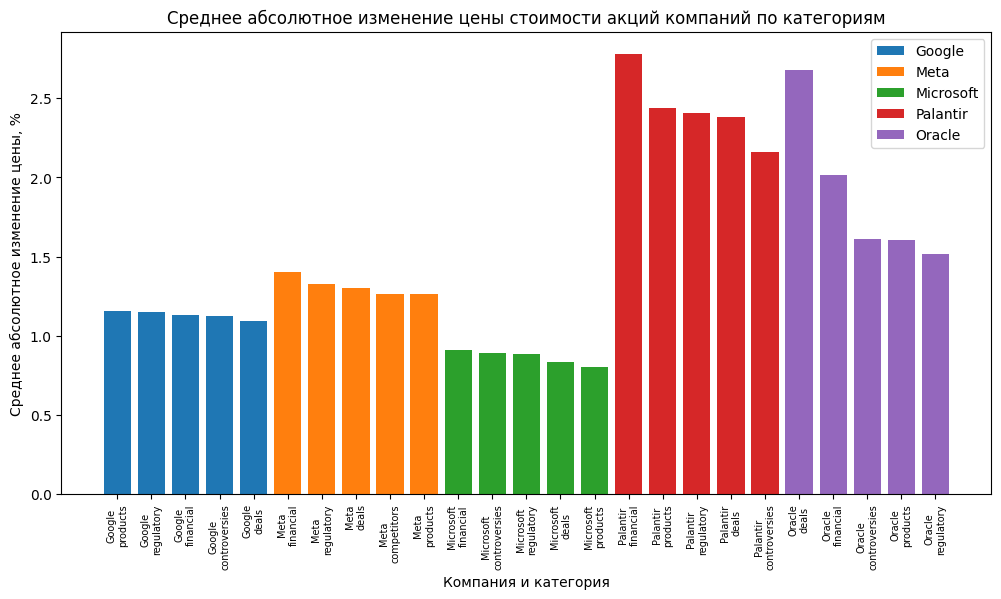

In [ ]:
news_stocks_abs = news_stocks.copy()
news_stocks_abs['abs_change_pct'] = abs(news_stocks_abs['change_pct'])

type_stats = (
    news_stocks_abs
    .groupby(['company', 'type'])
    .agg(
        n=('change_pct', 'size'),
        mean_change_pct=('change_pct', 'mean'),
        mean_abs_change_pct=('abs_change_pct', 'mean')
    ).reset_index()
)

type_stats = (
    type_stats
    .sort_values(['company', 'mean_abs_change_pct'], ascending=[True, False])
    .groupby('company')
    .head(5)
)


plt.figure(figsize=(12, 6))

companies = news_stocks_abs['company'].value_counts().head(5).index

for comp in companies:
    sub = type_stats[type_stats['company'] == comp]
    plt.bar([f"{comp}\n{cat}" for cat in sub['type']],
            sub['mean_abs_change_pct'],
            label=comp)

plt.title("Среднее абсолютное изменение цены стоимости акций компаний по категориям")
plt.xlabel("Компания и категория")
plt.xticks(size=7, rotation=90)
plt.ylabel("Среднее абсолютное изменение цены, %")
plt.legend()
plt.show()


гугл

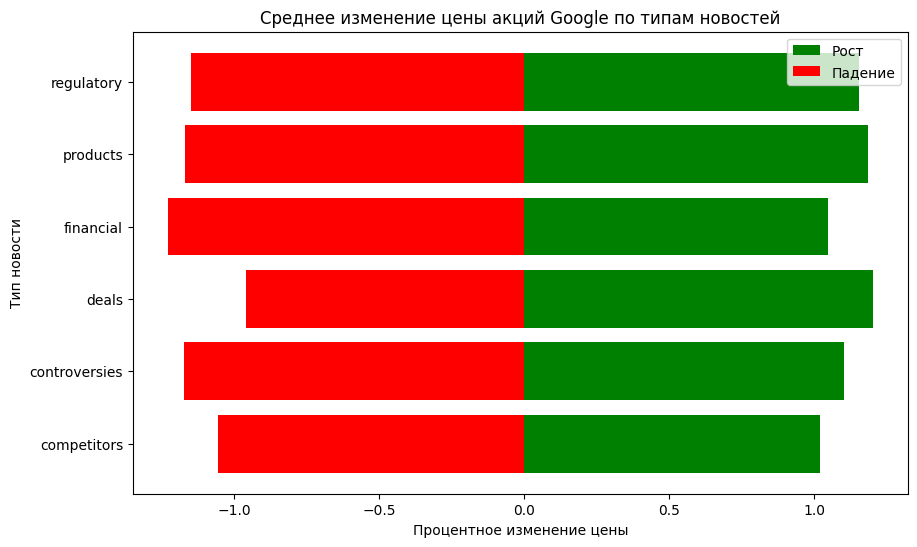

In [ ]:
googl_pos = googl_news_stocks[googl_news_stocks['change_pct'] > 0].groupby('type')['change_pct'].mean()
googl_neg = googl_news_stocks[googl_news_stocks['change_pct'] < 0].groupby('type')['change_pct'].mean()

plt.figure(figsize=(10,6))
plt.barh(sorted(set(googl_pos.index)), googl_pos, color='green', label='Рост')
plt.barh(sorted(set(googl_pos.index)), googl_neg, color='red', label='Падение')
plt.title('Среднее изменение цены акций Google по типам новостей')
plt.xlabel('Процентное изменение цены')
plt.ylabel('Тип новости')
plt.legend()
plt.show()


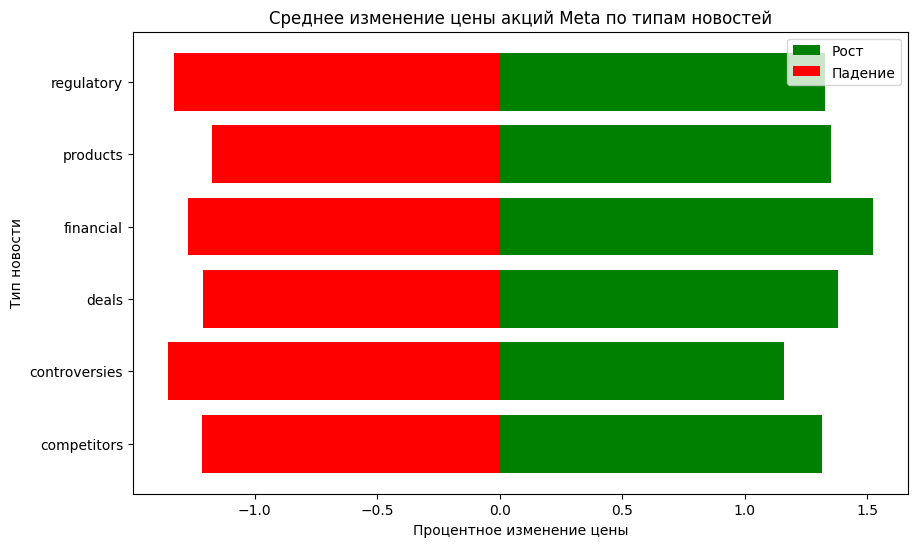

In [ ]:
meta_pos = meta_news_stocks[meta_news_stocks['change_pct'] > 0].groupby('type')['change_pct'].mean()
meta_neg = meta_news_stocks[meta_news_stocks['change_pct'] < 0].groupby('type')['change_pct'].mean()

plt.figure(figsize=(10,6))
plt.barh(sorted(set(meta_pos.index)), meta_pos, color='green', label='Рост')
plt.barh(sorted(set(meta_pos.index)), meta_neg, color='red', label='Падение')
plt.title('Среднее изменение цены акций Meta по типам новостей')
plt.xlabel('Процентное изменение цены')
plt.ylabel('Тип новости')
plt.legend()
plt.show()


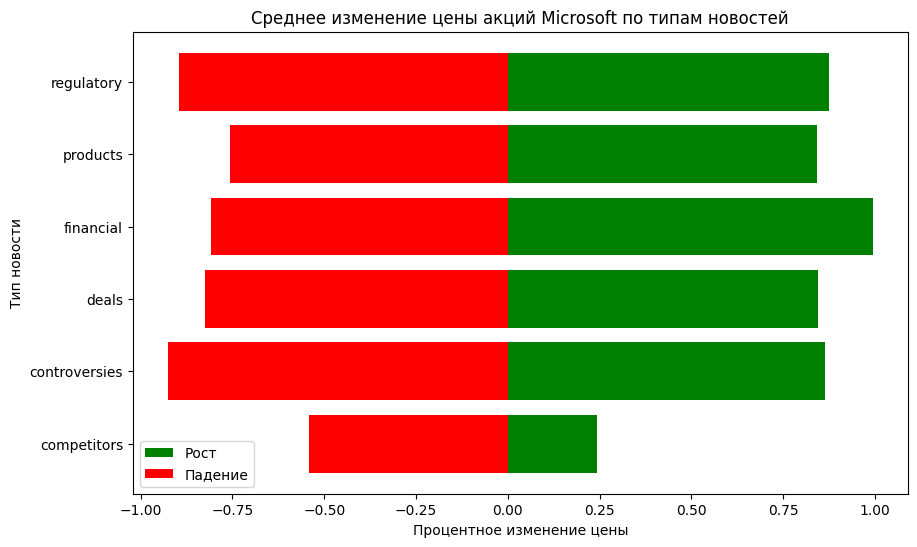

In [ ]:
msft_pos = msft_news_stocks[msft_news_stocks['change_pct'] > 0].groupby('type')['change_pct'].mean()
msft_neg = msft_news_stocks[msft_news_stocks['change_pct'] < 0].groupby('type')['change_pct'].mean()

plt.figure(figsize=(10,6))
plt.barh(sorted(set(msft_pos.index)), msft_pos, color='green', label='Рост')
plt.barh(sorted(set(msft_pos.index)), msft_neg, color='red', label='Падение')
plt.title('Среднее изменение цены акций Microsoft по типам новостей')
plt.xlabel('Процентное изменение цены')
plt.ylabel('Тип новости')
plt.legend()
plt.show()


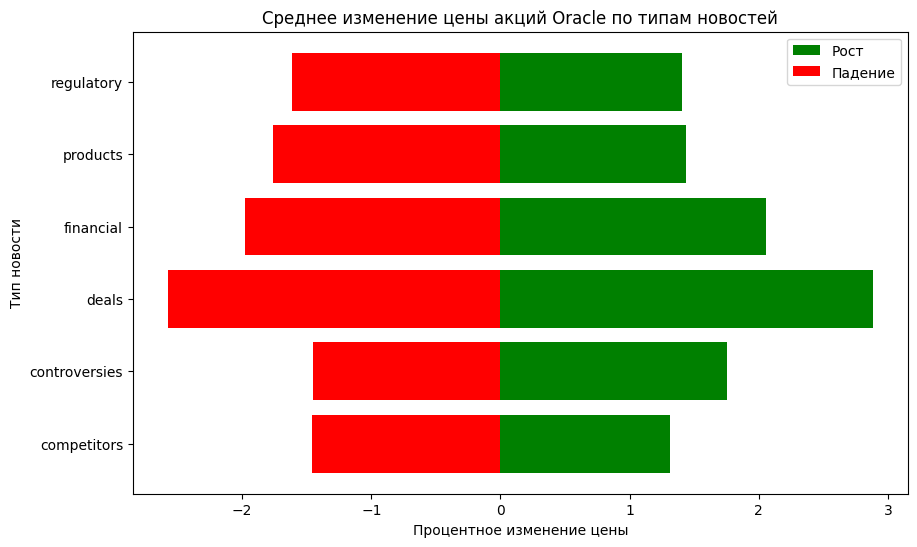

In [ ]:
orcl_pos = orcl_news_stocks[orcl_news_stocks['change_pct'] > 0].groupby('type')['change_pct'].mean()
orcl_neg = orcl_news_stocks[orcl_news_stocks['change_pct'] < 0].groupby('type')['change_pct'].mean()

plt.figure(figsize=(10,6))
plt.barh(sorted(set(orcl_pos.index)), orcl_pos, color='green', label='Рост')
plt.barh(sorted(set(orcl_pos.index)), orcl_neg, color='red', label='Падение')
plt.title('Среднее изменение цены акций Oracle по типам новостей')
plt.xlabel('Процентное изменение цены')
plt.ylabel('Тип новости')
plt.legend()
plt.show()


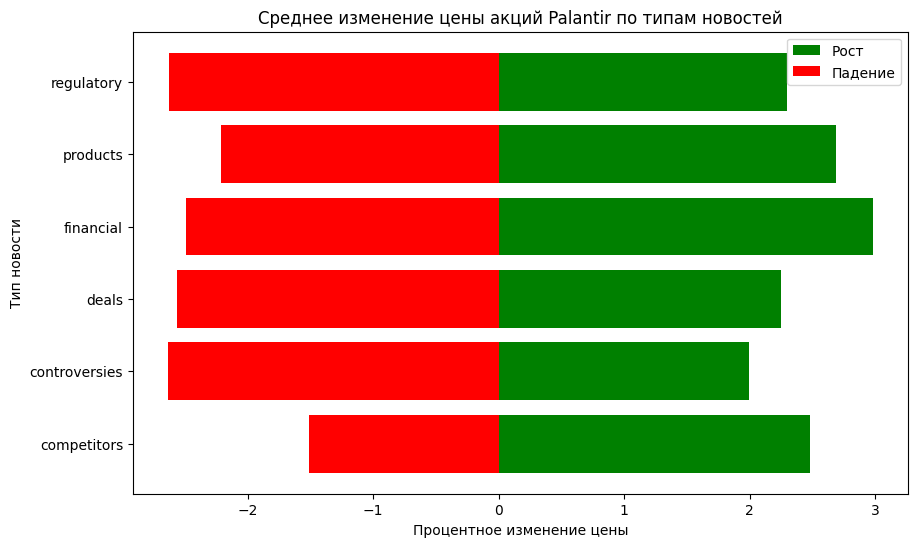

In [ ]:
pltr_pos = pltr_news_stocks[pltr_news_stocks['change_pct'] > 0].groupby('type')['change_pct'].mean()
pltr_neg = pltr_news_stocks[pltr_news_stocks['change_pct'] < 0].groupby('type')['change_pct'].mean()

plt.figure(figsize=(10,6))
plt.barh(sorted(set(pltr_pos.index)), pltr_pos, color='green', label='Рост')
plt.barh(sorted(set(pltr_pos.index)), pltr_neg, color='red', label='Падение')
plt.title('Среднее изменение цены акций Palantir по типам новостей')
plt.xlabel('Процентное изменение цены')
plt.ylabel('Тип новости')
plt.legend()
plt.show()


Теперь посмотрим, сколько в целом есть новостей каждой категории, в день выхода которых изменение было отрицательным/положительным

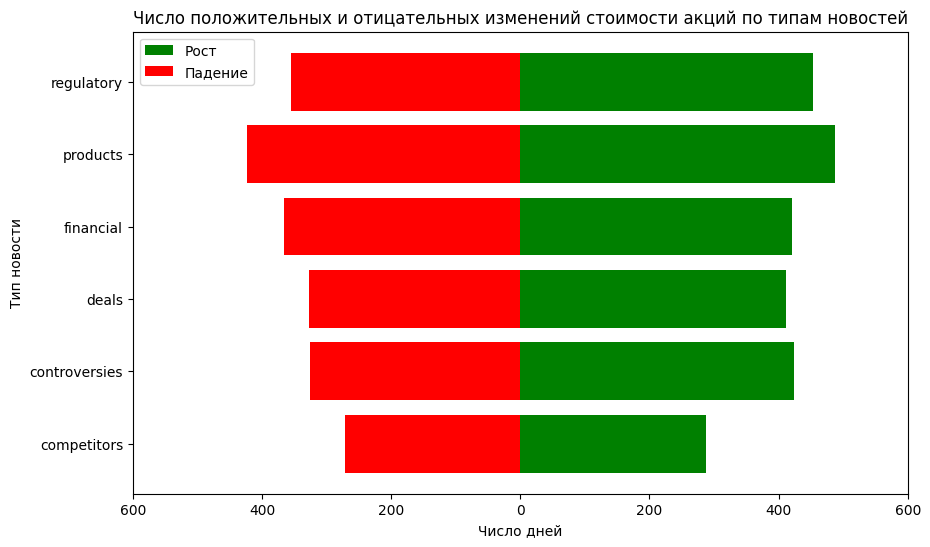

In [ ]:
news_stocks_g = news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
news_stocks_pos = news_stocks_g[news_stocks_g['change_pct'] > 0].groupby('type').size()
news_stocks_neg = news_stocks_g[news_stocks_g['change_pct'] < 0].groupby('type').size()

news_stocks_pos = news_stocks_pos.reindex(sorted(set(news_stocks_pos.index)))
news_stocks_neg = -news_stocks_neg.reindex(sorted(set(news_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(news_stocks_pos.index)), news_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(news_stocks_pos.index)), news_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

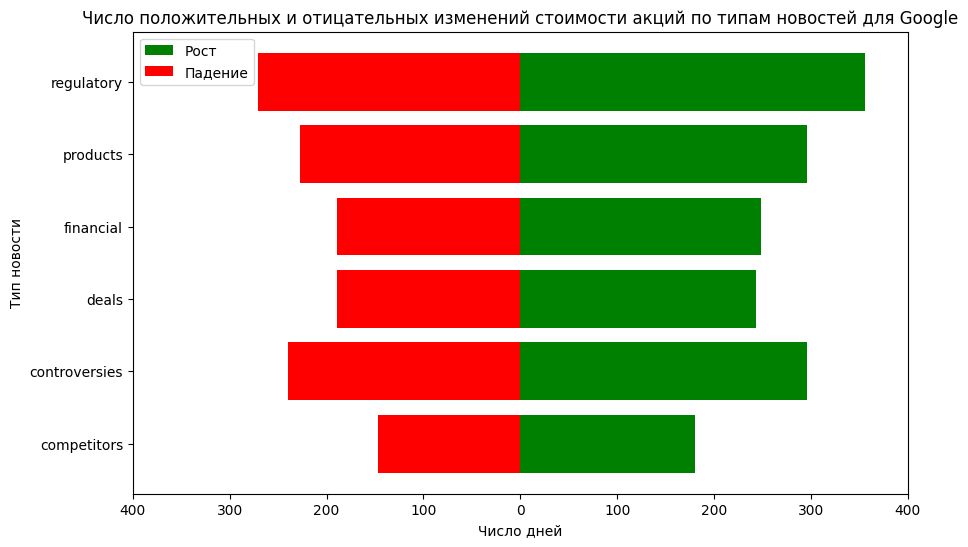

In [ ]:
googl_stocks_g = googl_news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
googl_stocks_pos = googl_stocks_g[googl_stocks_g['change_pct'] > 0].groupby('type').size()
googl_stocks_neg = googl_stocks_g[googl_stocks_g['change_pct'] < 0].groupby('type').size()

googl_stocks_pos = googl_stocks_pos.reindex(sorted(set(googl_stocks_pos.index)))
googl_stocks_neg = -googl_stocks_neg.reindex(sorted(set(googl_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(googl_stocks_pos.index)), googl_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(googl_stocks_pos.index)), googl_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей для Google')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

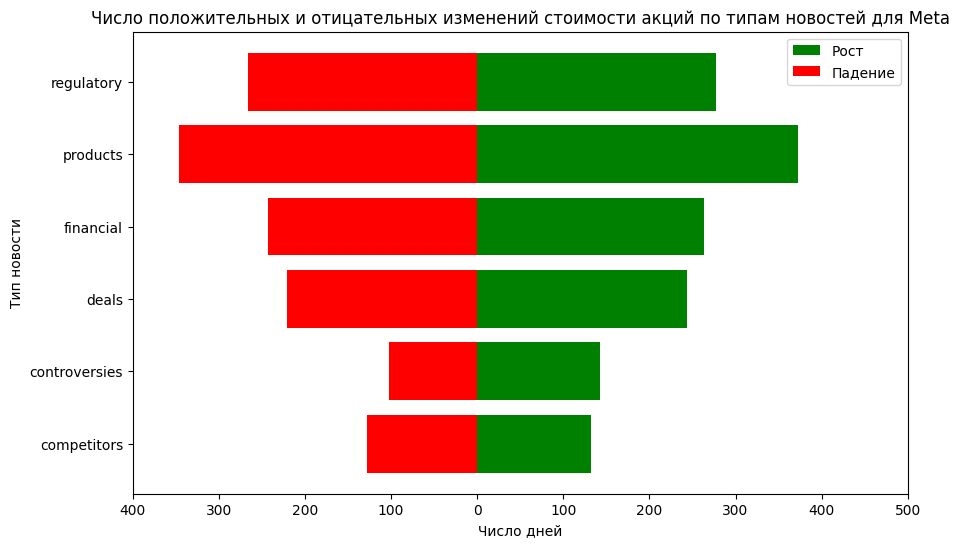

In [ ]:
meta_stocks_g = meta_news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
meta_stocks_pos = meta_stocks_g[meta_stocks_g['change_pct'] > 0].groupby('type').size()
meta_stocks_neg = meta_stocks_g[meta_stocks_g['change_pct'] < 0].groupby('type').size()

meta_stocks_pos = meta_stocks_pos.reindex(sorted(set(meta_stocks_pos.index)))
meta_stocks_neg = -meta_stocks_neg.reindex(sorted(set(meta_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(meta_stocks_pos.index)), meta_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(meta_stocks_pos.index)), meta_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей для Meta')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

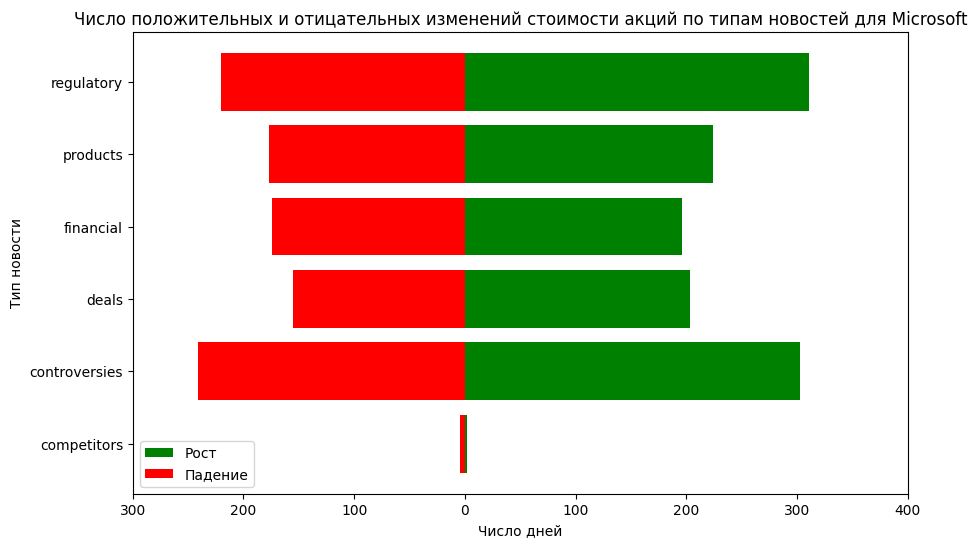

In [ ]:
msft_stocks_g = msft_news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
msft_stocks_pos = msft_stocks_g[msft_stocks_g['change_pct'] > 0].groupby('type').size()
msft_stocks_neg = msft_stocks_g[msft_stocks_g['change_pct'] < 0].groupby('type').size()

msft_stocks_pos = msft_stocks_pos.reindex(sorted(set(msft_stocks_pos.index)))
msft_stocks_neg = -msft_stocks_neg.reindex(sorted(set(msft_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(msft_stocks_pos.index)), msft_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(msft_stocks_pos.index)), msft_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей для Microsoft')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

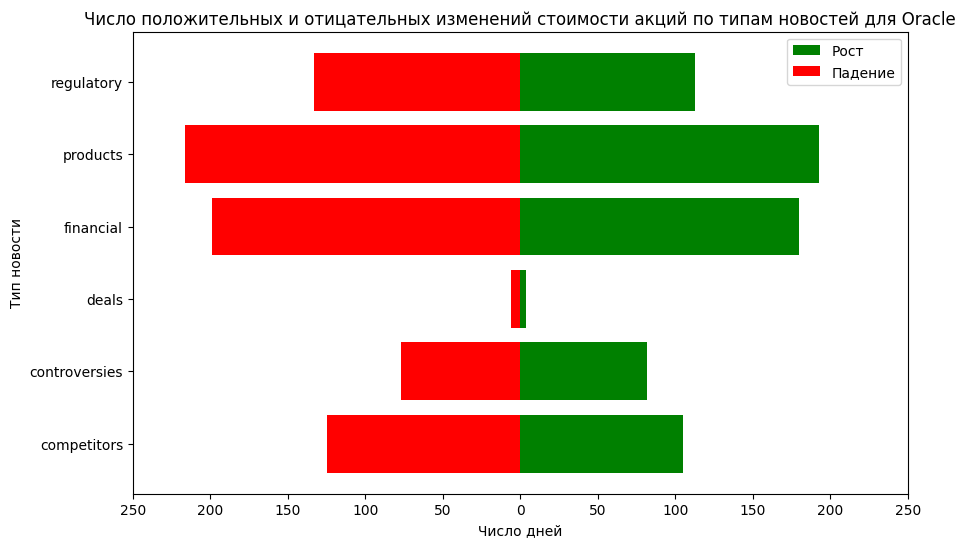

In [ ]:
orcl_stocks_g = orcl_news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
orcl_stocks_pos = orcl_stocks_g[orcl_stocks_g['change_pct'] > 0].groupby('type').size()
orcl_stocks_neg = orcl_stocks_g[orcl_stocks_g['change_pct'] < 0].groupby('type').size()

orcl_stocks_pos = orcl_stocks_pos.reindex(sorted(set(orcl_stocks_pos.index)))
orcl_stocks_neg = -orcl_stocks_neg.reindex(sorted(set(orcl_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(orcl_stocks_pos.index)), orcl_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(orcl_stocks_pos.index)), orcl_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей для Oracle')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

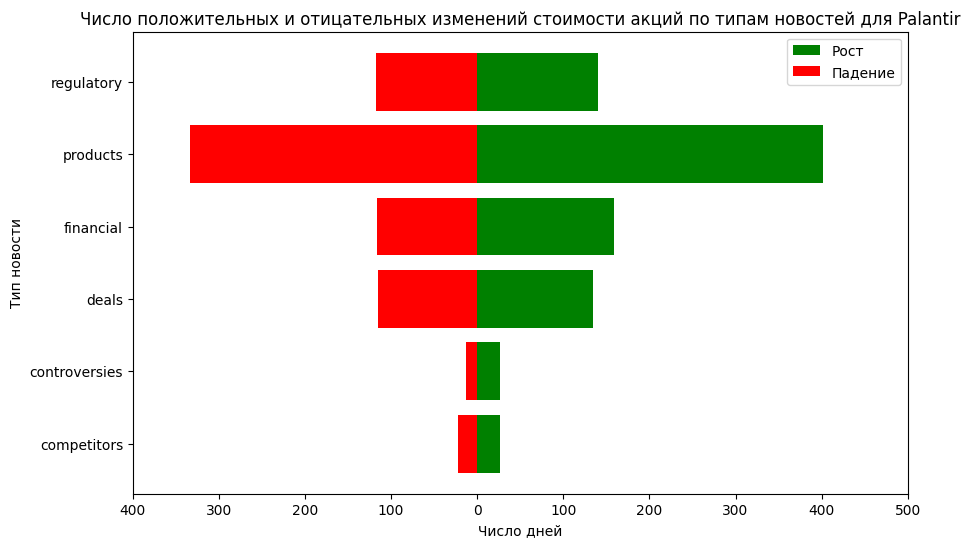

In [ ]:
pltr_stocks_g = pltr_news_stocks.groupby(['type','date'], as_index=False)['change_pct'].mean()
pltr_stocks_pos = pltr_stocks_g[pltr_stocks_g['change_pct'] > 0].groupby('type').size()
pltr_stocks_neg = pltr_stocks_g[pltr_stocks_g['change_pct'] < 0].groupby('type').size()

pltr_stocks_pos = pltr_stocks_pos.reindex(sorted(set(pltr_stocks_pos.index)))
pltr_stocks_neg = -pltr_stocks_neg.reindex(sorted(set(pltr_stocks_neg.index)))

plt.figure(figsize=(10,6))
plt.barh(sorted(set(pltr_stocks_pos.index)), pltr_stocks_pos, color='green', label='Рост')
plt.barh(sorted(set(pltr_stocks_pos.index)), pltr_stocks_neg, color='red', label='Падение')
plt.title('Число положительных и отицательных изменений стоимости акций по типам новостей для Palantir')
plt.xlabel('Число дней')
plt.xticks(plt.xticks()[0], [str(int(abs(x))) for x in plt.xticks()[0]])
plt.ylabel('Тип новости')
plt.legend()
plt.show()

In [ ]:
df_meta = meta_macro.copy()

df_meta['price_mean'] = (df_meta['open'] + df_meta['close']) / 2
df_meta = df_meta.drop(columns=['open', 'close'])
corr_me = df_meta.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_me, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций Meta')
plt.tight_layout()
plt.show()

In [ ]:
meta_macro['price_mean'] = (meta_macro['open'] + meta_macro['close']) / 2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(meta_macro['date'], meta_macro['price_mean'], color='blue', label='Meta (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Meta (средняя цена)', color='blue')

ax2 = ax1.twinx()
ax2.plot(meta_macro['date'], meta_macro['nasdaq_close'], color='orange', alpha=0.7, label='NASDAQ')
ax2.set_ylabel('NASDAQ', color='orange')

plt.title('Meta (средняя цена) vs NASDAQ')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(meta_macro['date'], meta_macro['price_mean'], color='blue', label='Meta (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Meta (средняя цена)', color='blue')

ax2 = ax1.twinx()
ax2.plot(meta_macro['date'], meta_macro['btc_usd'], color='orange', alpha=0.7, label='BTC_UCD')
ax2.set_ylabel('BTC_USD', color='orange')

plt.title('Meta (средняя цена) vs BTC_USD')
fig.tight_layout()
plt.show()

In [ ]:
df_orcl = orcl_macro.copy()
#oracle heatmap
df_orcl['price_mean'] = (df_orcl['open'] + df_orcl['close']) / 2
df_orcl = df_orcl.drop(columns=['open', 'close'])
corr_o = df_orcl.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_o, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций Oracle')
plt.tight_layout()
plt.show()

In [ ]:
orcl_macro['price_mean'] = (orcl_macro['open'] + orcl_macro['close']) / 2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(orcl_macro['date'], orcl_macro['price_mean'], color='red', label='Oracle (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Oracle (средняя цена)', color='red')

ax2 = ax1.twinx()
ax2.plot(orcl_macro['date'], orcl_macro['nasdaq_close'], color='orange', alpha=0.7, label='NASDAQ')
ax2.set_ylabel('NASDAQ', color='orange')

plt.title('Oracle (средняя цена) vs NASDAQ')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(orcl_macro['date'], orcl_macro['price_mean'], color='red', label='Oracle (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Oracle (средняя цена)', color='red')

ax2 = ax1.twinx()
ax2.plot(orcl_macro['date'], orcl_macro['xag_usd_oz'], color='orange', alpha=0.7, label='BTC_UCD')
ax2.set_ylabel('Серебро', color='orange')

plt.title('Oracle (средняя цена) vs Серебро')
fig.tight_layout()
plt.show()

In [ ]:
df_pltr = pltr_macro.copy()
#palantir heatmap
df_pltr['price_mean'] = (df_pltr['open'] + df_pltr['close']) / 2
df_pltr = df_pltr.drop(columns=['open', 'close'])
corr_p = df_pltr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_p, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций Palantir')
plt.tight_layout()
plt.show()


In [ ]:
pltr_macro['price_mean'] = (pltr_macro['open'] + pltr_macro['close']) / 2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(pltr_macro['date'], pltr_macro['price_mean'], color='black', label='Palantir (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Palantir (средняя цена)', color='black')

ax2 = ax1.twinx()
ax2.plot(pltr_macro['date'], pltr_macro['xau_usd_oz'], color='orange', alpha=0.7, label='Золото')
ax2.set_ylabel('Золото', color='orange')

plt.title('Palantir (средняя цена) vs Золото')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(pltr_macro['date'], pltr_macro['price_mean'], color='black', label='Palantir (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Palantir (средняя цена)', color='black')

ax2 = ax1.twinx()
ax2.plot(pltr_macro['date'], pltr_macro['btc_usd'], color='orange', alpha=0.7, label='BTC_UCD')
ax2.set_ylabel('BTC_USD', color='orange')

plt.title('Palantir (средняя цена) vs BTC_USD')
fig.tight_layout()
plt.show()

In [ ]:
df_msft = msft_macro.copy()
#microsoft heatmap
df_msft['price_mean'] = (df_msft['open'] + df_msft['close']) / 2
df_msft = df_msft.drop(columns=['open', 'close'])
corr_ms = df_msft.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_ms, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций Microsoft')
plt.tight_layout()
plt.show()

In [ ]:
msft_macro['price_mean'] = (msft_macro['open'] + msft_macro['close']) / 2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(msft_macro['date'], msft_macro['price_mean'], color='green', label='Microsoft (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Microsoft (средняя цена)', color='green')

ax2 = ax1.twinx()
ax2.plot(msft_macro['date'], msft_macro['nasdaq_close'], color='orange', alpha=0.7, label='NASDAQ')
ax2.set_ylabel('NASDAQ', color='orange')

plt.title('Microsoft (средняя цена) vs NASDAQ')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(msft_macro['date'], msft_macro['price_mean'], color='green', label='Microsoft (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Microsoft (средняя цена)', color='green')

ax2 = ax1.twinx()
ax2.plot(msft_macro['date'], msft_macro['btc_usd'], color='orange', alpha=0.7, label='BTC_UCD')
ax2.set_ylabel('BTC_USD', color='orange')

plt.title('Microsoft (средняя цена) vs BTC_USD')
fig.tight_layout()
plt.show()

In [ ]:
df_googl = googl_macro.copy()
#google heatmap
df_googl['price_mean'] = (df_googl['open'] + df_googl['close']) / 2
df_googl = df_googl.drop(columns=['open', 'close'])
corr_g = df_googl.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_g, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций Google')
plt.tight_layout()
plt.show()

In [ ]:
googl_macro['price_mean'] = (googl_macro['open'] + googl_macro['close']) / 2

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(googl_macro['date'], googl_macro['price_mean'], color='navy', label='Google (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Google(средняя цена)', color='navy')

ax2 = ax1.twinx()
ax2.plot(googl_macro['date'], googl_macro['nasdaq_close'], color='orange', alpha=0.7, label='NASDAQ')
ax2.set_ylabel('NASDAQ', color='orange')

plt.title('Google (средняя цена) vs NASDAQ')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(googl_macro['date'], googl_macro['price_mean'], color='navy', label='Google (средняя цена)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Google (средняя цена)', color='navy')

ax2 = ax1.twinx()
ax2.plot(googl_macro['date'], googl_macro['btc_usd'], color='orange', alpha=0.7, label='BTC_UCD')
ax2.set_ylabel('BTC_USD', color='orange')

plt.title('Google (средняя цена) vs BTC_USD')
fig.tight_layout()
plt.show()